In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
import seaborn as sns  ## This will be for the prettier confusion matrix vis
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Read in data
census = pd.read_csv("ACS_Full_Features.csv")
census.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [ ]:
# check column names to drop non-numeric, unnecessary columns
census.columns

Index(['NAME', 'Median Age by Sex', 'Total Population', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races',
       'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year', 'Associate's Degree',
       'Bachelor's Degree', 'Master's Degree', 'Professional School Degree',
       'Doctorate', 'Median Income', 'Population Below Poverty Line',
       'Disabled Population', 'Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category',
       'Poverty Rate (%)', 'Poverty Rate Classification', 'Total Degrees',
   

In [ ]:
# Drop redundant columns like non-percent values, categorical columns, name, state, county

census_tree = census.drop(columns = ['NAME', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', "Associate's Degree",
       "Bachelor's Degree", "Master's Degree", 'Professional School Degree',
       'Doctorate', 'Population Below Poverty Line',
       'Disabled Population', 'Median Income', 'Income Category', 'Poverty Rate (%)', 'Total Degrees', 'Degree Attainment', 'POC Population Category', 'White Population (%)',
       'Black/African American Population (%)', 'Asian Population (%)',
       'Hawaiian/Pacific Islander Population (%)',
       'American Indian/Alaskan Population (%)',
       'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population Category', 'state',
       'county'])

In [ ]:
census_tree.head()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),Poverty Rate Classification,Degree Percentage (%),POC Population (%),Disabled Population (%)
0,39.0,58761,28663,30098,31283,19408,3274,5829,704,10001,...,12.2,16.4,14.5,17.8,6.8,7.4,Low Poverty,20.215789,25.550961,16.039550
1,43.7,233420,114077,119343,123882,76904,12778,22974,3299,38059,...,12.1,16.0,14.4,17.0,7.5,9.1,Low Poverty,23.299203,16.018764,13.656927
2,40.6,24877,12973,11904,14573,7202,1499,2907,488,5136,...,13.2,15.4,8.3,10.9,2.8,3.8,High Poverty,8.441532,54.528279,15.958516
3,40.3,22251,11897,10354,12287,6598,1482,2442,729,5261,...,11.2,17.0,14.8,12.3,3.0,3.5,Low Poverty,7.815379,24.174194,18.412656
4,40.8,59077,29864,29213,30951,18142,3945,5482,1029,11248,...,14.2,16.4,12.9,15.3,6.4,4.9,Low Poverty,10.185013,8.495692,16.839041


In [ ]:
# Check corr for multicollinearity, drop more columns
numeric_data = census_tree.select_dtypes(include=[np.number])
numeric_data.corr()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),Degree Percentage (%),POC Population (%),Disabled Population (%)
Median Age by Sex,1.000000,-0.164515,-0.165130,-0.163873,-0.160616,-0.161082,-0.133016,-0.157574,-0.124214,-0.148040,...,0.149705,0.133644,0.096237,-0.024147,-0.137164,-0.167245,-0.112324,0.039915,-0.346768,0.386163
Total Population,-0.164515,1.000000,0.999876,0.999881,0.998902,0.999287,0.985320,0.983243,0.956766,0.981963,...,-0.206665,-0.200617,-0.150528,-0.019950,0.123290,0.263977,0.375554,0.323869,0.215563,-0.218180
Male,-0.165130,0.999876,1.000000,0.999514,0.998484,0.999015,0.983843,0.982787,0.956730,0.980817,...,-0.207367,-0.201057,-0.150027,-0.018872,0.124668,0.265006,0.376034,0.322471,0.213721,-0.218895
Female,-0.163873,0.999881,0.999514,1.000000,0.999072,0.999313,0.986531,0.983453,0.956571,0.982849,...,-0.205927,-0.200138,-0.150982,-0.021002,0.121909,0.262905,0.374994,0.325162,0.217316,-0.217425
Never Married,-0.160616,0.998902,0.998484,0.999072,1.000000,0.999444,0.986144,0.980213,0.960617,0.981194,...,-0.199925,-0.195745,-0.150162,-0.024155,0.115108,0.254316,0.367376,0.321465,0.216846,-0.211771
Now Married,-0.161082,0.999287,0.999015,0.999313,0.999444,1.000000,0.984282,0.978124,0.957522,0.979025,...,-0.207674,-0.202854,-0.154057,-0.022608,0.122060,0.264631,0.380536,0.328367,0.214878,-0.218369
Widowed,-0.133016,0.985320,0.983843,0.986531,0.986144,0.984282,1.000000,0.980689,0.947665,0.989059,...,-0.191753,-0.187481,-0.146456,-0.024797,0.109410,0.246993,0.356363,0.317829,0.213313,-0.196246
Divorced,-0.157574,0.983243,0.982787,0.983453,0.980213,0.978124,0.980689,1.000000,0.931372,0.977419,...,-0.201798,-0.190658,-0.139593,-0.014589,0.120969,0.257630,0.359315,0.331878,0.214447,-0.209414
"12th Grade, No Diploma",-0.124214,0.956766,0.956730,0.956571,0.960617,0.957522,0.947665,0.931372,1.000000,0.956029,...,-0.144402,-0.142570,-0.108384,-0.016192,0.082580,0.184233,0.267553,0.208944,0.197507,-0.159191
High School Diploma,-0.148040,0.981963,0.980817,0.982849,0.981194,0.979025,0.989059,0.977419,0.956029,1.000000,...,-0.190942,-0.181024,-0.130932,-0.007800,0.121910,0.246885,0.330945,0.287506,0.207212,-0.201443


In [ ]:
# The male/female columns have high corr, so do the marriage columns, and the non-college education columns. start with those
census_tree = census_tree.drop(columns = [ 'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year'])

In [ ]:
# Check remaining with vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = census_tree.drop(columns = ['Poverty Rate Classification'])

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature        VIF
0           Median Age by Sex  94.050062
1            Total Population   1.367414
2         Total Income 10k(%)   7.708362
3     Total Income 10k-15k(%)  11.091759
4     Total Income 15k-25k(%)  20.336136
5     Total Income 25k-35k(%)  22.003707
6      Total Income 35k-50(%)  22.861586
7     Total Income 50k-75k(%)  34.221539
8    Total Income 75k-100k(%)  28.359782
9   Total Income 100k-150k(%)  28.221508
10  Total Income 150k-200k(%)  18.092527
11      Total Income >200k(%)  10.859073
12      Degree Percentage (%)  18.007531
13         POC Population (%)   4.191082
14    Disabled Population (%)  30.105468


In [ ]:
# Dropping total income columns because of correlation. The race columns are too importnat, but that does show a racial disparity that's important to note
census_tree = census_tree.drop(columns = ['Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)'])

In [ ]:
# Check dtypes for MN Naive Bayes
census_tree.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Poverty Rate Classification,object
Degree Percentage (%),float64
POC Population (%),float64
Disabled Population (%),float64


In [ ]:
# Only remaining object is poverty category, which I will binarize
# The decision tree works better this way for this data (not sure why)
census_tree['Poverty Rate Classification'] = census_tree['Poverty Rate Classification'].map({'Low Poverty': 0, 'High Poverty': 1})

In [ ]:
#Next, train/test/split the data
TrainingData, TestingData = train_test_split(census_tree, test_size=.3, random_state = 801) # Using random_stte for reproduceability
print(TrainingData.head())
print(TestingData.head())

      Median Age by Sex  Total Population  Poverty Rate Classification  \
2370               41.5              5247                            0   
3132               40.7             19794                            0   
2575               37.4              1647                            1   
211                47.5              8651                            0   
2758               42.0             60053                            0   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
2370              17.533829           17.476653                14.236707  
3132              15.408710            5.410731                12.230979  
2575              12.204007           25.500911                27.808136  
211               17.928563           16.818865                17.015374  
2758              11.872846           10.029474                15.114982  
      Median Age by Sex  Total Population  Poverty Rate Classification  \
1640               49.0        

In [ ]:
## remove and save the labels from the Training Data
TrainingLabels = TrainingData["Poverty Rate Classification"]
## remove column from training data
TrainingData=TrainingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Training Labels are:")
print(TrainingLabels.head())
print("The Training Data is:")
print(TrainingData.head())

The Training Labels are:
2370    0
3132    0
2575    1
211     0
2758    0
Name: Poverty Rate Classification, dtype: int64
The Training Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
2370               41.5              5247              17.533829   
3132               40.7             19794              15.408710   
2575               37.4              1647              12.204007   
211                47.5              8651              17.928563   
2758               42.0             60053              11.872846   

      POC Population (%)  Disabled Population (%)  
2370           17.476653                14.236707  
3132            5.410731                12.230979  
2575           25.500911                27.808136  
211            16.818865                17.015374  
2758           10.029474                15.114982  


In [ ]:
# Repeat for test data
TestingLabels = TestingData["Poverty Rate Classification"]
## Drop the label
TestingData=TestingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Testing Labels are:")
print(TestingLabels.head())
print("The Testing Data is:")
print(TestingData.head())

The Testing Labels are:
1640    0
1376    0
2470    0
1435    1
1658    0
Name: Poverty Rate Classification, dtype: int64
The Testing Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
1640               49.0             44876              21.621802   
1376               46.2             11312              16.274752   
2470               41.8             24996               8.905425   
1435               44.5             11291              10.123107   
1658               44.1               485              20.412371   

      POC Population (%)  Disabled Population (%)  
1640            8.396470                18.539977  
1376            5.304102                13.012730  
2470            8.989438                18.654985  
1435           62.297405                21.078735  
1658            6.185567                16.494845  


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

In [ ]:
# Tree 1
MyDT_R=DecisionTreeClassifier(criterion='entropy',
                            splitter='best',
                            max_depth=6,
                            min_samples_split=2,
                            min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            class_weight=None)

In [ ]:
MyDT_R.fit(TrainingData, TrainingLabels)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=100)

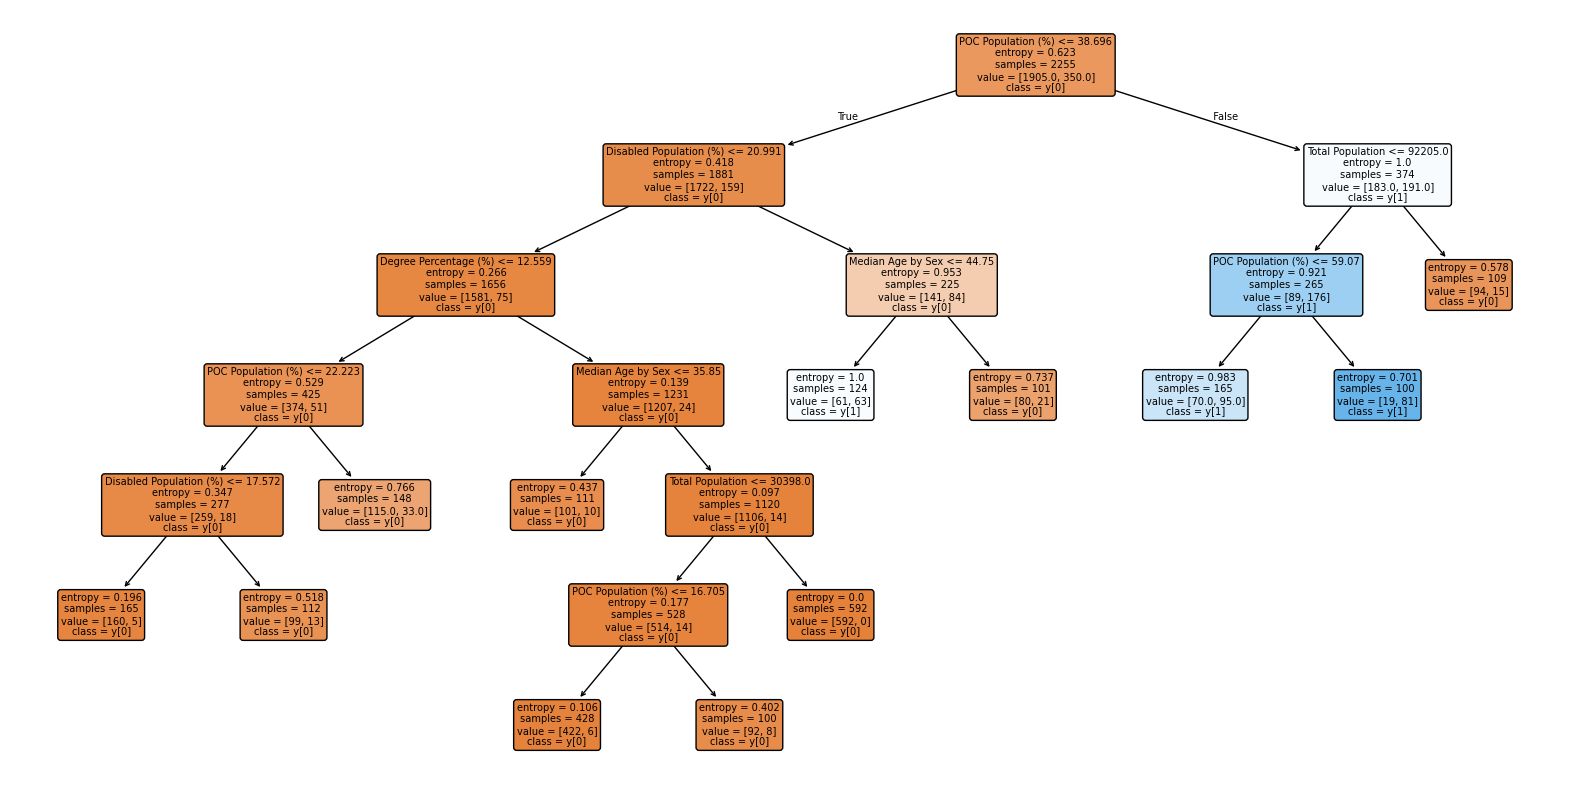

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(MyDT_R, filled=True, feature_names=TrainingData.columns, class_names=True, rounded=True)
plt.show()

In [ ]:
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=TrainingData.columns,
                  filled=True,
                  rounded=True,
                  special_characters=True)

graph = graphviz.Source(TREE_data)
graph.render("Tree_Record1")

'Tree_Record1.pdf'

In [ ]:
# Check accuracy, evaluate model 2
print("\nActual\n")
print(TestingLabels.head())
print("Prediction\n")
DT_pred_R=MyDT_R.predict(TestingData)
print(DT_pred_R[:10])


Actual

1640    0
1376    0
2470    0
1435    1
1658    0
Name: Poverty Rate Classification, dtype: int64
Prediction

[0 0 0 1 0 0 0 0 1 0]


In [ ]:
bn_matrix_R = confusion_matrix(TestingLabels, DT_pred_R)
print("\nThe confusion matrix for entropy/best is:")
print(bn_matrix_R)


The confusion matrix for entropy/best is:
[[741  74]
 [ 59  93]]


[Text(0.5, 1.0, 'Entropy/Best DT Matrix')]

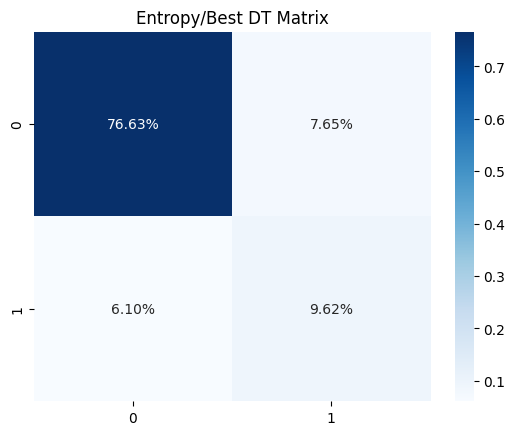

In [ ]:
sns.heatmap(bn_matrix_R/np.sum(bn_matrix_R), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Entropy/Best DT Matrix')

In [ ]:
# Accuracy: Note: I know this says Gini/Best but the calcuiation is for the tree above. I nnoticed this typo only after running the values, everything should be correct otherwise.
accuracy = accuracy_score(DT_pred_R, TestingLabels)
print('Accuracy for Gini/Best:', accuracy)

Accuracy for Gini/Best: 0.8624612202688728


In [ ]:
# Tree 2
MyDT_R=DecisionTreeClassifier(criterion='gini',
                            splitter='random',
                            max_depth=6,
                            min_samples_split=2,
                            min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            class_weight=None)

In [ ]:
MyDT_R.fit(TrainingData, TrainingLabels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, splitter='random')

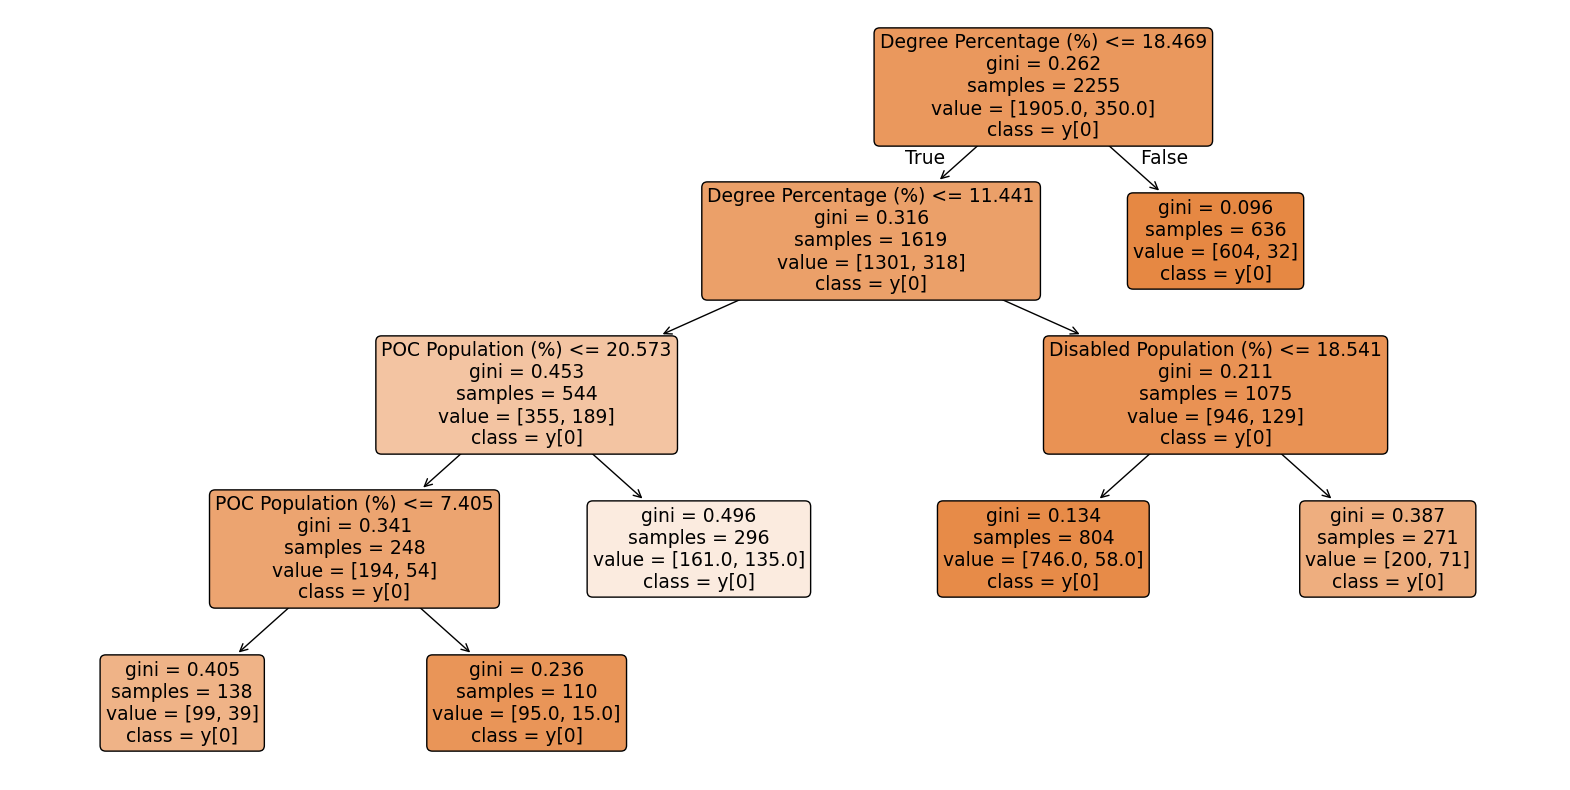

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(MyDT_R, filled=True, feature_names=TrainingData.columns, class_names=True, rounded=True)
plt.show()

In [ ]:
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=TrainingData.columns,
                  filled=True,
                  rounded=True,
                  special_characters=True)

graph = graphviz.Source(TREE_data)
graph.render("Tree_Record2")

'Tree_Record2.pdf'

In [ ]:
# Check accuracy, evaluate model 2
print("\nActual\n")
print(TestingLabels.head())
print("Prediction\n")
DT_pred_R=MyDT_R.predict(TestingData)
print(DT_pred_R[:10])


Actual

1640    0
1376    0
2470    0
1435    1
1658    0
Name: Poverty Rate Classification, dtype: int64
Prediction

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
bn_matrix_R = confusion_matrix(TestingLabels, DT_pred_R)
print("\nThe confusion matrix for gini/random is:")
print(bn_matrix_R)


The confusion matrix for gini/random is:
[[815   0]
 [152   0]]


[Text(0.5, 1.0, 'Gini/Random DT Matrix')]

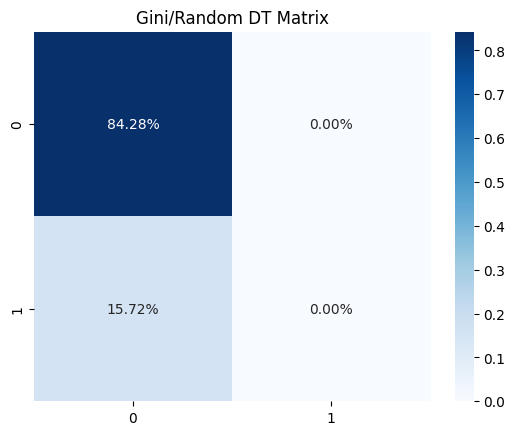

In [ ]:
sns.heatmap(bn_matrix_R/np.sum(bn_matrix_R), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Gini/Random DT Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(DT_pred_R, TestingLabels)
print('Accuracy for Gini/Best:', accuracy)

Accuracy for Gini/Best: 0.8428128231644261


In [ ]:
# POC population appears frequently, need to filter it from dataset
# All other root/splitter combos had the root of POC Population
TestingData2 = TestingData.drop(columns = ['POC Population (%)'])
TrainingData2 = TrainingData.drop(columns = ['POC Population (%)'])

All other hyperparameter edits, criterion and splitter included, produced a POC Population root node, or a very messy tree. That's why the filtering was done.

In [ ]:
# Third different root node retry
MyDT_R=DecisionTreeClassifier(criterion='gini', # Different root too
                            splitter='random',
                            max_depth=6,
                            min_samples_split=2,
                            min_samples_leaf=50, # Other difference
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            class_weight=None)

In [ ]:
MyDT_R.fit(TrainingData2, TrainingLabels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, splitter='random')

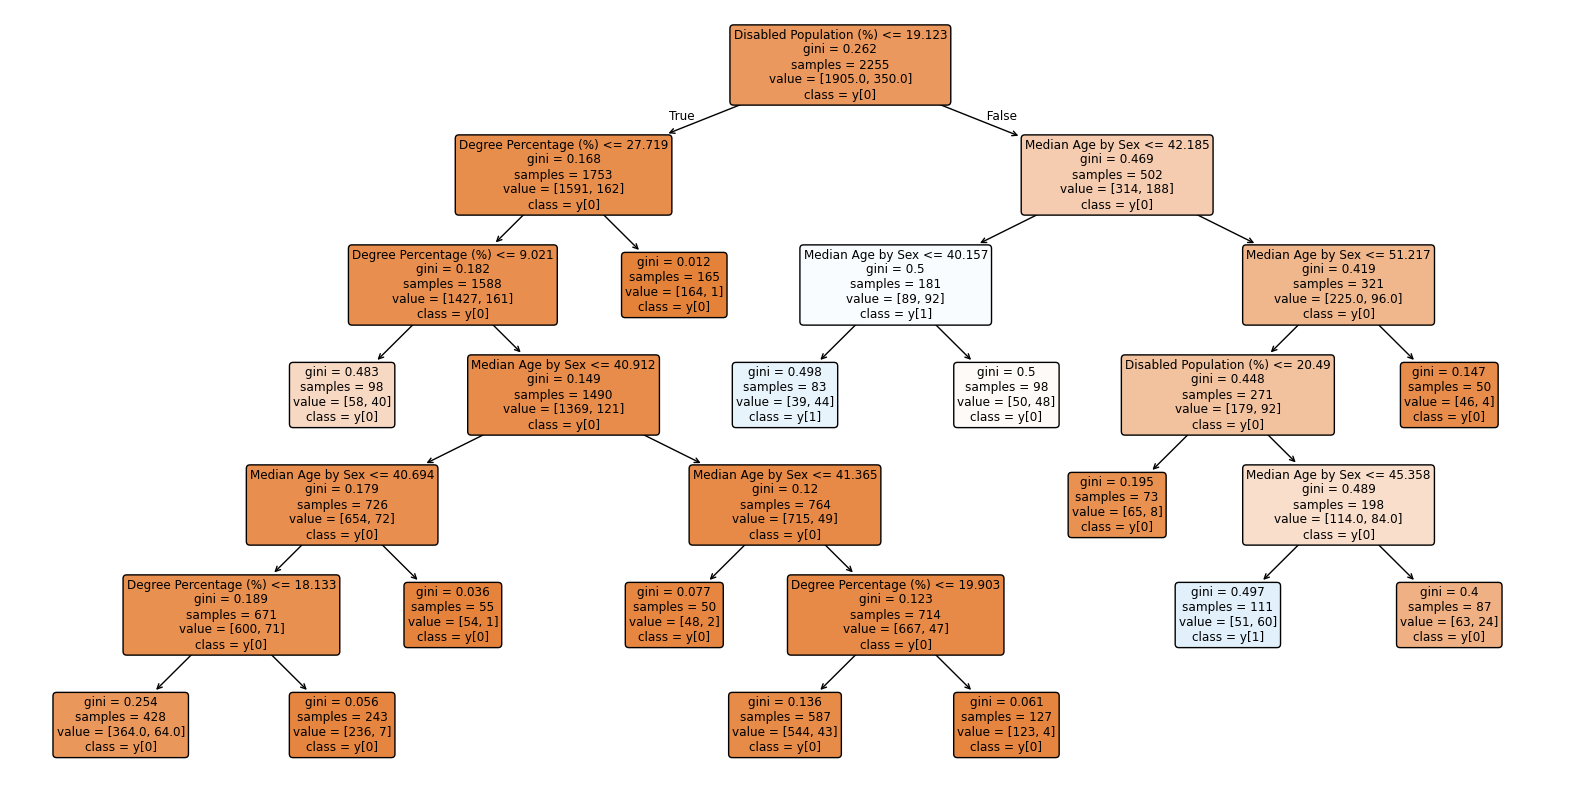

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(MyDT_R, filled=True, feature_names=TrainingData2.columns, class_names=True, rounded=True)
plt.show()

In [ ]:
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=TrainingData2.columns,
                  filled=True,
                  rounded=True,
                  special_characters=True)

graph = graphviz.Source(TREE_data)
graph.render("Tree_Record3")

'Tree_Record3.pdf'

In [ ]:
# Check accuracy, evaluate model 3
print("\nActual\n")
print(TestingLabels.head())
print("Prediction\n")
DT_pred_R=MyDT_R.predict(TestingData2)
print(DT_pred_R[:10])


Actual

1640    0
1376    0
2470    0
1435    1
1658    0
Name: Poverty Rate Classification, dtype: int64
Prediction

[0 0 0 1 0 0 0 0 0 1]


In [ ]:
bn_matrix_R = confusion_matrix(TestingLabels, DT_pred_R)
print("\nThe confusion matrix for gini/random is:")
print(bn_matrix_R)


The confusion matrix for gini/random is:
[[783  32]
 [121  31]]


[Text(0.5, 1.0, 'Gini/Random Filtered DT Matrix')]

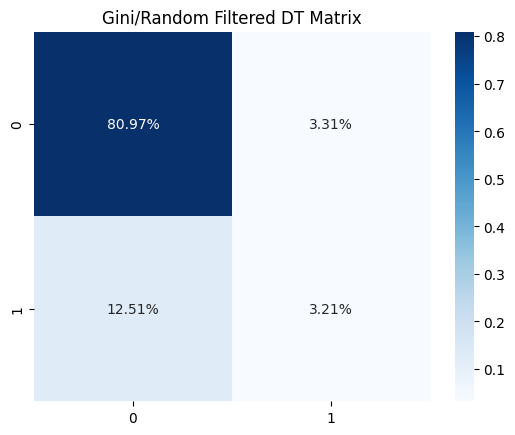

In [ ]:
sns.heatmap(bn_matrix_R/np.sum(bn_matrix_R), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Gini/Random Filtered DT Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(DT_pred_R, TestingLabels)
print('Accuracy for Gini/Best:', accuracy)

Accuracy for Gini/Best: 0.8417786970010341


In [ ]:
# For context in classification, count of ACS_Full_Features Poverty Labels:
census['Poverty Rate Classification'].value_counts()

,count
Poverty Rate Classification,
Low Poverty,2720
High Poverty,502


502/2720 = 18.5%, rounded, so a little less than one fifth of the data is category 1, for context.

In [ ]:
# Finally, tree that's different by non-root classification, using unfiltered data:
# To alter the tree more towards class 1, what if the class weights were altered?
MyDT_R=DecisionTreeClassifier(criterion='gini',
                            splitter='random',
                            max_depth=6,
                            min_samples_split=2,
                            min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            class_weight={0:1, 1:3}) # Other difference

In [ ]:
MyDT_R.fit(TrainingData, TrainingLabels)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=6,
                       min_samples_leaf=100, splitter='random')

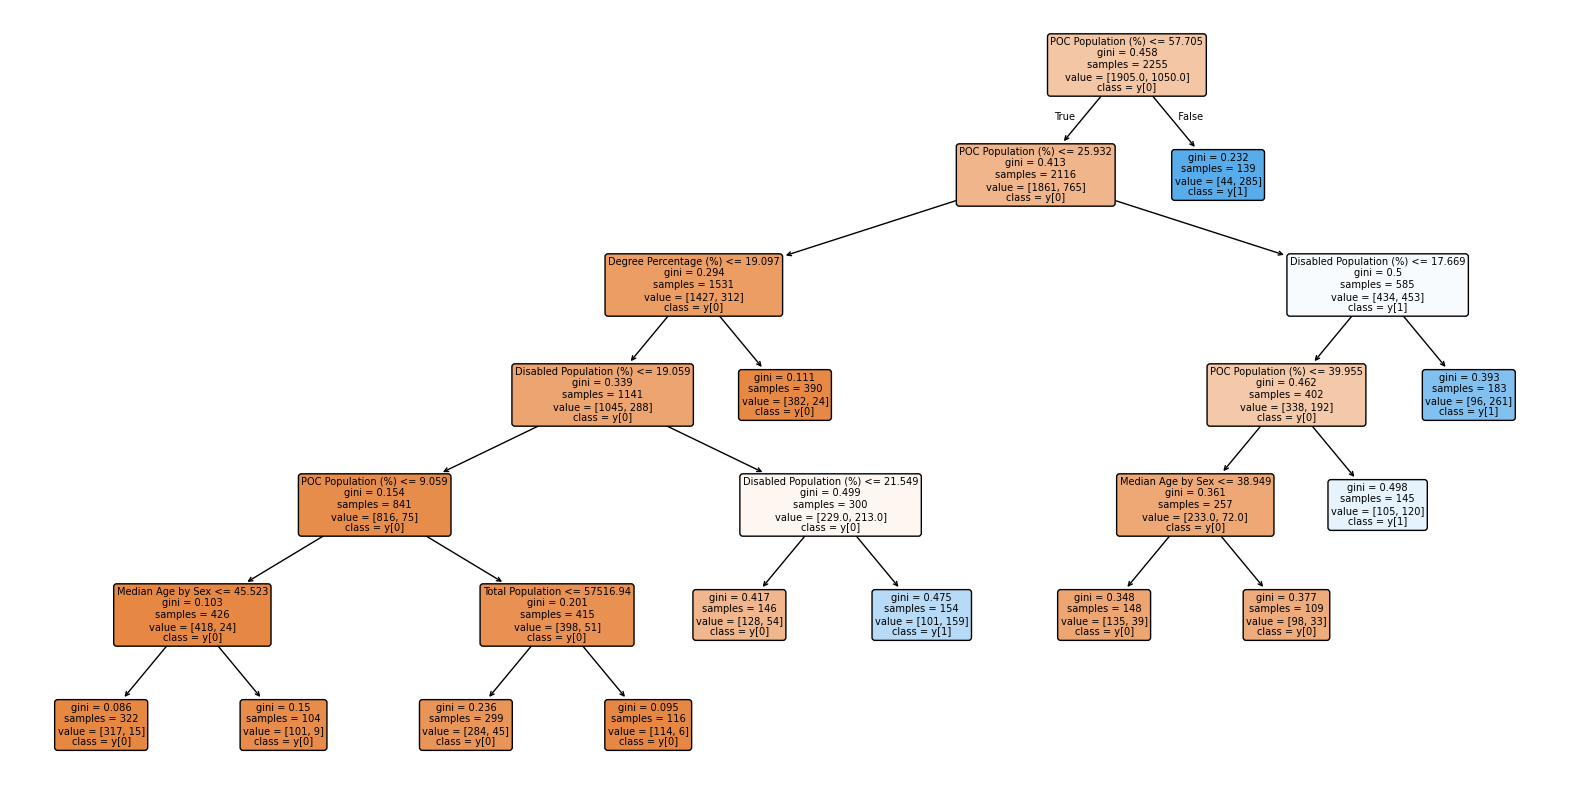

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(MyDT_R, filled=True, feature_names=TrainingData.columns, class_names=True, rounded=True)
plt.show()

In [ ]:
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=TrainingData.columns,
                  filled=True,
                  rounded=True,
                  special_characters=True)

graph = graphviz.Source(TREE_data)
graph.render("Tree_Record4")

'Tree_Record4.pdf'

In [ ]:
# Check accuracy, evaluate model 4
print("\nActual\n")
print(TestingLabels.head())
print("Prediction\n")
DT_pred_R=MyDT_R.predict(TestingData)
print(DT_pred_R[:10])


Actual

1640    0
1376    0
2470    0
1435    1
1658    0
Name: Poverty Rate Classification, dtype: int64
Prediction

[0 0 0 1 0 0 0 0 1 0]


In [ ]:
bn_matrix_R = confusion_matrix(TestingLabels, DT_pred_R)
print("\nThe confusion matrix for gini/random is:")
print(bn_matrix_R)


The confusion matrix for gini/random is:
[[673 142]
 [ 42 110]]


[Text(0.5, 1.0, 'Gini/Random Weighted DT Matrix')]

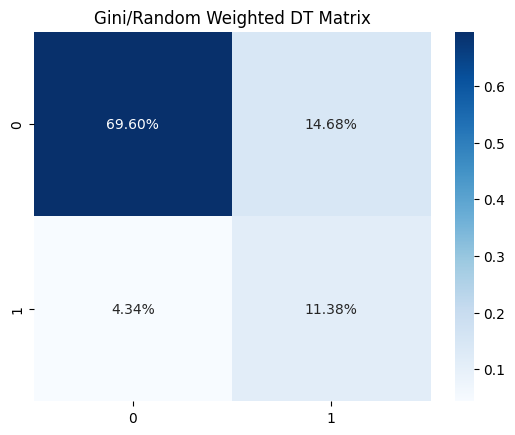

In [ ]:
sns.heatmap(bn_matrix_R/np.sum(bn_matrix_R), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Gini/Random Weighted DT Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(DT_pred_R, TestingLabels)
print('Accuracy for Gini/Best:', accuracy)

Accuracy for Gini/Best: 0.8097207859358841
